# Investigate Hotel Business using Data Visualization

Author : Theofilus Arifin

---



# Introduction

**Table of Content**

- Introduction
- Load Dataset
- Data Exploration
- Data Cleansing
- Data Visualization
- Conclusion

**Background**

Sangat penting bagi suatu perusahaan untuk selalu menganalisa performa bisnisnya. Pada kesempatan kali ini, kita akan lebih mendalami bisnis dalam bidang perhotelan. Fokus yang kita tuju adalah untuk mengetahui bagaimana perilaku pelanggan kita dalam melakukan pemesanan hotel, dan hubungannya terhadap tingkat pembatalan pemesanan hotel. Hasil dari insight yang kita temukan akan kita sajikan dalam bentuk data visualisasi agar lebih mudah dipahami dan bersifat lebih persuasif.

**Business Questions**
- Jenis hotel apa yang paling sering dikunjungi oleh pelanggan?
- Apakah terdapat pola kenaikan atau penurunan pemesanan hotel pada bulan-bulan tertentu?
- Apakah durasi menginap mempengaruhi tingkat pembatalan pemesanan hotel?
- Apakah jarak waktu antara pemesanan hotel dan hari kedatangan tamu mempengaruhi tingkat pembatalan pemesanan hotel?

**Objective**

Membuat visualisasi berbasis data sebagai insight bagi bisnis hotel

## Load Dataset

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [40]:
!git clone https://github.com/Theofilusarifin/Investigate-Hotel-Business-Using-Data-Visualization

fatal: destination path 'Investigate-Hotel-Business-Using-Data-Visualization' already exists and is not an empty directory.


In [41]:
df = pd.read_csv('/content/Investigate-Hotel-Business-Using-Data-Visualization/dataset.csv')
df.shape

(119390, 29)

In [42]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out


# Data Exploration

In [43]:
# def barplot comparison
def barplot_value(x, y, title):
  chart = sns.barplot(x=x, y=y, ci = None)
  chart.set_title(title)
  for p in chart.patches:
        chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
            textcoords='offset points')
  plt.xticks(rotation=45, ha='right')
  return chart

Melakukan investigasi awal terhadap data untuk memahami karakteristik dan informasi yang terkandung didalamnya.



In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [45]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Jumlah fitur numerik:", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Jumlah fitur kategorikal:", len(categorical_feats))

Jumlah fitur numerik: 20
Jumlah fitur kategorikal: 9


**Key Takeaways** :

- Dataset memeiliki 119.390 records dan 29 fitur
- 20 fitur bertipe numerik dan 9 fitur bertipe kategorikal
- Tipe data pada feature yang ada berupa: object, float64, int64

## Check Missing Value

In [46]:
total_missing = df.isnull().sum()
percent_missing = (df.isnull().sum() / len(df)).round(4) * 100

missing_data = pd.DataFrame({'Feature': total_missing.index, 'Total': total_missing.values, 'Percent': percent_missing.values})
missing_data = missing_data[missing_data['Total'] > 0].sort_values(by='Percent', ascending=False)
missing_data

,Feature,Total,Percent
22,company,112593,94.31
21,agent,16340,13.69
13,city,488,0.41
10,children,4,0.00


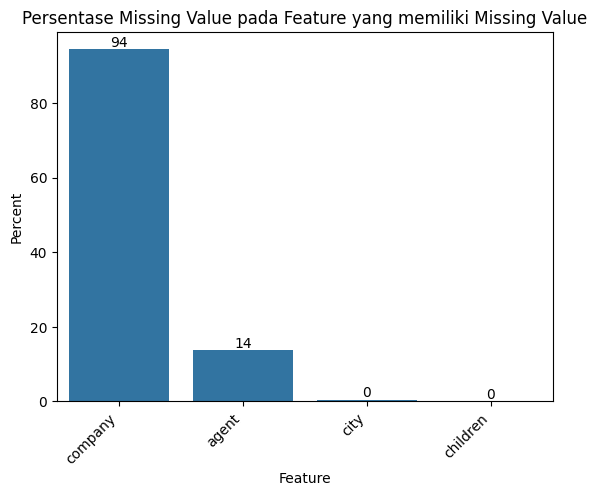

In [47]:
barplot_value(missing_data.Feature, missing_data.Percent, "Persentase Missing Value pada Feature yang memiliki Missing Value");

**Key Takeaways** :

- Terdapat missing/null value pada fitur `company`, `agent`, `city`, dan `children`
- Akan dilakukan imputasi nilai pada missing value


## Check Duplicated Data

In [48]:
df.duplicated().sum()

33261

**Key Takeaways** :

- Terdapat 33.261 duplicate data, data ini hampir 1/3 dari keseluruhan data
- Data ini tidak akan di drop karena akan menyebabkan banyak informasi yang hilang
- Tidak ada unique id pada data. Hal ini memungkinkan bahwa terdapat pemesanan dengan nilai tiap feature yang sama terjadi oleh orang yang berbeda

## Descriptive Statistic

### Numerical Feature

In [49]:
df[numerical_feats].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Key Takeaways** :

- Fitur adr, Averange Daily Rate (room revenue/number of room sold) terdapat value negatif. Hal itu merupakan anomali dan perlu didrop.


In [50]:
results = []
for col in numerical_feats:
    skewness = df[col].skew()
    kurtosis = df[col].kurt()

    # Determine skewness type
    if skewness > 0:
        skew_type = 'positive'
    elif skewness < 0:
        skew_type = 'negative'
    else:
        skew_type = 'no skew'
    results.append({'Column': col, 'Skewness': skewness, 'Kurtosis': kurtosis, 'Skew_Type': skew_type})

results_df = pd.DataFrame(results)
results_df = results_df.reindex(results_df['Skewness'].abs().sort_values(ascending=False).index)
results_df

,Column,Skewness,Kurtosis,Skew_Type
9,babies,24.646545,1633.948235,positive
11,previous_cancellations,24.458049,674.073693,positive
12,previous_bookings_not_canceled,23.539800,767.245210,positive
7,adults,18.317805,1352.115116,positive
16,days_in_waiting_list,11.944353,186.793070,positive
17,adr,10.530214,1013.189851,positive
13,booking_changes,6.000270,79.393605,positive
10,is_repeated_guest,5.326315,26.370077,positive
18,required_car_parking_spaces,4.163233,29.998056,positive
8,children,4.112590,18.673692,positive


**Key Takeaways** :

- Terdapat beberapa feature yang memiliki nilai mean dan median yang jauh, menandakan persebaran yang skew
- Beberapa fitur yang memiliki skewness yang tinggi adalah `babies`, `previous_cancellations`,	`previous_bookings_not_canceled`,	 `adults`, `days_in_waiting_list`, `adr`
- Log Transform akan dilakukan pada fitur-fitur ini untuk mengurangi skewness

### Categorical Feature

In [51]:
df[categorical_feats].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [52]:
top_freq_percentages = {}
top_categories = {}

for feature in categorical_feats:
    value_counts = df[feature].value_counts()
    top_category = value_counts.idxmax()

    top_freq_percentage = (value_counts[top_category] / len(df)) * 100
    top_freq_percentages[feature] = top_freq_percentage
    top_categories[feature] = top_category

top_freq_percentages_df = pd.DataFrame.from_dict(top_freq_percentages, orient='index', columns=['top_frequency_percentage']).sort_values('top_frequency_percentage', ascending=False)
top_categories_df = pd.DataFrame.from_dict(top_categories, orient='index', columns=['top_category'])

result_df = pd.concat([top_freq_percentages_df, top_categories_df], axis=1)
result_df


,top_frequency_percentage,top_category
deposit_type,87.646369,No Deposit
distribution_channel,81.975040,TA/TO
meal,77.318033,Breakfast
customer_type,75.059050,Personal
hotel,66.446101,City Hotel
reservation_status,62.958372,Check-Out
market_segment,47.304632,Online TA
city,40.698551,Kota Denpasar
arrival_date_month,11.623252,October


**Key Takeaways** :

- Terdapat beberapa feature yang memiliki top value dengan persentase lebih dari 75% keseluruhan data
- Beberapa fitur yang memiliki top value dengan persentase tinggi adalah `deposit_type`, `distribution_channel`,	`meal`,	 `customer_type`

In [53]:
# cek unique valaue dari setiap fitur kategorikal
for feature in categorical_feats:
    print("{} have {} unique values".format(feature, df[feature].nunique()))
    print("{} values: {}".format(feature, df[feature].unique()))
    print('-' * 100)

hotel have 2 unique values
hotel values: ['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month have 12 unique values
arrival_date_month values: ['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']
----------------------------------------------------------------------------------------------------
meal have 5 unique values
meal values: ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']
----------------------------------------------------------------------------------------------------
city have 177 unique values
city values: ['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' nan 'Kabupaten Tangerang' 'Kota Semarang'
 'Kota Serang' 'Kota Tangerang' 'Kota Bogor' 'Kabupaten Bandung'
 'Kabupaten Magelang' 'Kabupaten Sumedang' 'Kota Jakarta Timur'
 'Kabupaten Purwakarta' 'Kabupaten K

## Check Outlier

In [54]:
def calculate_outliers(column):
  # Calculate the IQR
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1

  # Define lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Filter the column to count outliers
  outliers = column[(column < lower_bound) | (column > upper_bound)]

  # Calculate percentage of outliers
  percentage_outliers = (outliers.shape[0] / column.shape[0]) * 100

  return outliers.shape[0], percentage_outliers

In [55]:
outliers_info = []

for feature in numerical_feats:
  num_outliers, percentage_outliers = calculate_outliers(df[feature])

  # if percentage_outliers > 0:
  outliers_info.append({
      'feature': feature,
      'outlier_count': num_outliers,
      'percentage_outliers': percentage_outliers
  })

outliers_df = pd.DataFrame(outliers_info).sort_values(by='percentage_outliers', ascending=False)
outliers_df

,feature,outlier_count,percentage_outliers
7,adults,29710,24.884831
13,booking_changes,18076,15.140297
8,children,8590,7.194907
18,required_car_parking_spaces,7416,6.211576
11,previous_cancellations,6484,5.430941
10,is_repeated_guest,3810,3.191222
17,adr,3793,3.176983
16,days_in_waiting_list,3698,3.097412
12,previous_bookings_not_canceled,3620,3.032080
6,stays_in_weekdays_nights,3354,2.809281


**Key Takeaways**:

- Terdapat beberapa fitur yang memiliki outlier yang tinggi di atas 5% yaitu `adults`, `booking_changes`, `children`, `required_car_parking_spaces`, dan `previous_cancellations`
- Outlier perlu dianalisis lebih lanjut sebelum melakukan pembuangan data outlier

Mengecek data anomali tamu = 0 atau tedapat kamar yang dibooking namun tidak ada tamu yang menginap



In [56]:
guest_0 = df['adults']+df['children']+df['babies']
guest_0 = df[guest_0 == 0]
guest_0.shape[0]

180

**Key takeaways**:

- Terdapat 180 kamar tidak memiliki tamu
- Data ini merupakan anomali dan nantinya akan di drop

# Data Cleansing

In [57]:
df_clean = df.copy()

## Handling Null Values


---



Fitur yang terdapat null values `company`, `city`, `children`, `agent`

Treatment :

- `company` - di drop karena memiliki null value hingga 94%
- `agent` - null value diisi dengan 0, mengindikasikan tamu melakukan reservasi mandiri atau tidak melalui agen
- `children` - null value diisi dengan 0, mengindikasikan tamu tidak membawa anak-anak
- `city` - null values diisi dengan 'Undefined', karena kota tidak diketahui secara pasti.

In [58]:
# company
df_clean.drop('company', axis=1, inplace=True)

In [59]:
# agent, children
ft = ['children', 'agent']
for col in ft:
    df_clean[col].fillna(0, inplace=True)

# ----------------------------------------------------------------
# city
df_clean['city'].fillna('Undefined', inplace=True)

In [60]:
df_clean.isna().sum().sum()

0

## Handling Inconsistent Value


---



Mengubah datatype feature `Children` menjadi integer

In [61]:
df_clean['children'] = df_clean['children'].astype('int64')

Pada feature `meal` terdapat kategori undefined, kategori ini dapat dijadikan satu dengan No Meal

In [62]:
df_clean['meal'].replace('Undefined', 'No Meal', inplace = True)

Menghapus data pemesanan yang memiliki 0 guest

In [63]:
df_clean['guest'] = df_clean['adults']+df_clean['children']+df_clean['babies']
df_clean = df_clean[df_clean['guest'] > 0]
df_clean.drop('guest', axis=1, inplace=True)

In [65]:
df_clean.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,3,No Deposit,0.0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,4,No Deposit,0.0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,No Deposit,0.0,0,Personal,75.0,0,0,Check-Out


# Data Visualization

In [67]:
df_viz = df_clean.copy()

### Monthly Hotel Booking Analysis Based On Hotel Type


---



Analisis ini berfokus untuk melihat trend dari pemesanan hotel untuk setiap jenis hotel.

#### Ratio Total Booking Based on Hotel Type

In [75]:
hotel_type = df_viz.groupby('hotel').agg({
    'hotel': 'count'
})

hotel_type.columns = ['total']
hotel_type.reset_index(inplace=True)
hotel_type

,hotel,total
0,City Hotel,79163
1,Resort Hotel,40047


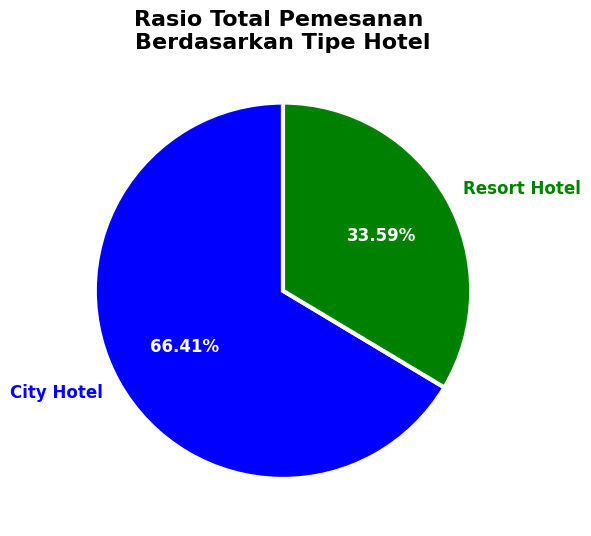

In [109]:
fig, ax = plt.subplots(figsize=(6, 6))
#-------------------------------------------------------------------
patches, texts, pcts = ax.pie(
    hotel_type['total'], labels=hotel_type['hotel'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['blue', 'green'])
#-------------------------------------------------------------------
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Rasio Total Pemesanan \nBerdasarkan Tipe Hotel', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

**Key takeaways**:

- City Hotel memiliki lebih dari dua kali lipat jumlah pemesanan dibandingkan Resort Hotel, menunjukkan bahwa City Hotel mungkin lebih populer di kalangan pelanggan.

- Perbedaan ini mungkin disebabkan oleh faktor-faktor seperti lokasi, fasilitas, atau harga yang lebih menarik di City Hotel dibandingkan Resort Hotel.

- Data ini dapat digunakan untuk mengoptimalkan pengelolaan kapasitas dan persediaan kamar di masing-masing hotel, sehingga memaksimalkan pendapatan.

#### Ratio Total Booking Based on Hotel Type per Month

In [91]:
monthly_booking = df_viz.groupby(['hotel', 'arrival_date_month']).agg({
    'hotel': 'count'
})

monthly_booking.columns = ['total']
monthly_booking.reset_index(inplace=True)

# Sort by months list
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_booking['month'] = monthly_booking['arrival_date_month'].str[:3]
monthly_booking['month'] = pd.Categorical(monthly_booking['month'], categories=months)
monthly_booking = monthly_booking.sort_values('month')

monthly_booking.drop('arrival_date_month', axis=1, inplace=True)
monthly_booking

,hotel,total,month
4,City Hotel,4336,Jan
16,Resort Hotel,2435,Jan
3,City Hotel,4114,Feb
15,Resort Hotel,2645,Feb
7,City Hotel,3730,Mar
19,Resort Hotel,2191,Mar
0,City Hotel,4950,Apr
12,Resort Hotel,3102,Apr
20,Resort Hotel,3334,May
8,City Hotel,6434,May


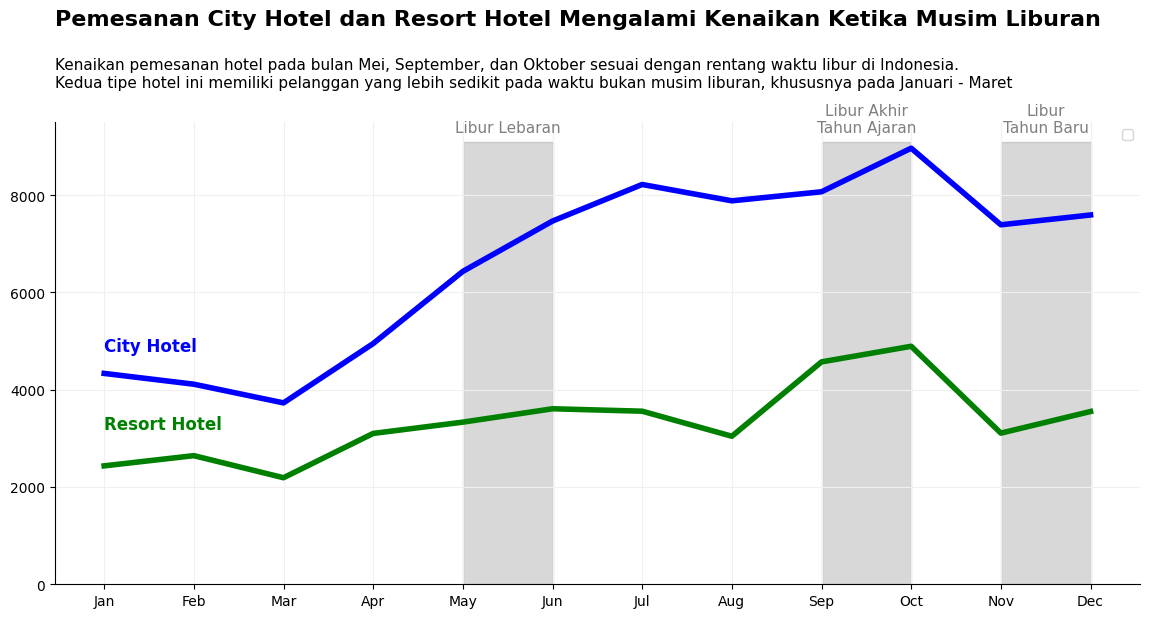

In [145]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------------------------
# membuat plot
sns.lineplot(x='month', y='total', hue='hotel', data=monthly_booking, palette=['blue', 'green'], linewidth=4)
plt.grid(color='#f0f0f0')
plt.ylim(0, 9500)

# -----------------------------------------------------------------------------------------------------------------------------
# mengatur label
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('')
plt.xlabel('')

# -----------------------------------------------------------------------------------------------------------------------------
# legend
plt.legend([])
plt.text(x=0, y=4800, s='City Hotel', fontsize=12, color='blue', ha='left', fontweight='bold')
plt.text(x=0, y=3200, s='Resort Hotel', fontsize=12, color='green', ha='left', fontweight='bold')

# -----------------------------------------------------------------------------------------------------------------------------
# menambahkan judul dan deskripsi
plt.title('Pemesanan City Hotel dan Resort Hotel Mengalami Kenaikan Ketika Musim Liburan', fontsize=16, pad=70, loc='left', fontweight='bold')
plt.text(y=10500, x=-0.55, s='Kenaikan pemesanan hotel pada bulan Mei, September, dan Oktober sesuai dengan rentang waktu libur di Indonesia.\nKedua tipe hotel ini memiliki pelanggan yang lebih sedikit pada waktu bukan musim liburan, khususnya pada Januari - Maret',
         ha='left', va='center', size=11)

# -----------------------------------------------------------------------------------------------------------------------------
# set holiday season I
plt.stackplot([4, 5], [9100], color='grey', alpha=0.3)
plt.text(x=4.5, y=9300, s='Libur Lebaran', fontsize=11, color='grey', ha='center')

plt.stackplot([8, 9], [9100], color='grey', alpha=0.3)
plt.text(x=8.5, y=9300, s='Libur Akhir\nTahun Ajaran', fontsize=11, color='grey', ha='center')

# set holiday season
plt.stackplot([10, 11], [9100], color='grey', alpha=0.3)
plt.text(x=10.5, y=9300, s='Libur\nTahun Baru', fontsize=11, color='grey', ha='center')

plt.show()


**Key takeaways**:

- Kenaikan pemesanan hotel pada bulan Mei, September, dan Oktober sesuai dengan rentang waktu libur Lebaran, akhir tahun ajaran, dan Tahun Baru.

- Permintaan akomodasi hotel meningkat karena orang-orang memanfaatkan waktu libur untuk berlibur, berkumpul bersama keluarga, atau menghadiri acara khusus.

- Industri perhotelan perlu mempersiapkan diri dengan menyediakan layanan tambahan dan memastikan ketersediaan kamar yang mencukupi selama periode libur tersebut.

 ### Impact Analysis Of Stay Duration On Hotel Bookings Cancellation Rates


---



Analisis ini berfokus untuk melihat trend antara durasi menginap dengan tingkat pembatalan pemesanan hotel.



In [146]:
df_city = df_viz[df_viz['hotel']=='City Hotel']

# group fitur iscanceled dan agregasi menggunakan count
cancel = df_city.groupby('is_canceled')[['is_canceled']].count()
#-------------------------------------------------------------------
cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel

,is_canceled,total
0,Not Canceled,46084
1,Canceled,33079


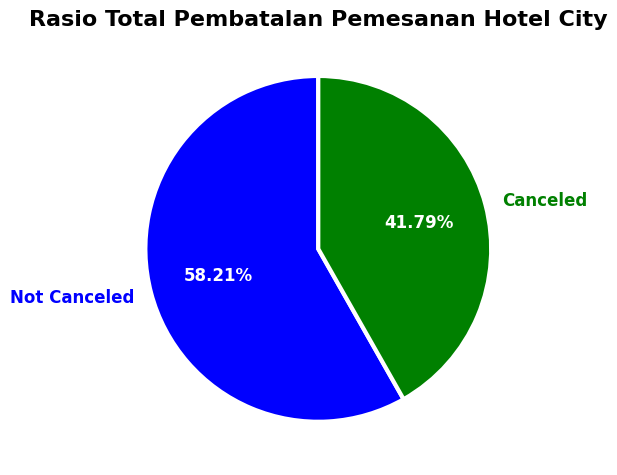

In [147]:
fig, ax = plt.subplots(figsize=(6, 6))
#-------------------------------------------------------------------
patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['blue', 'green'])
#-------------------------------------------------------------------
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Rasio Total Pembatalan Pemesanan Hotel City', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

In [148]:
df_resort = df_viz[df_viz['hotel']=='Resort Hotel']

# group fitur iscanceled dan agregasi menggunakan count
cancel = df_resort.groupby('is_canceled')[['is_canceled']].count()
#-------------------------------------------------------------------
cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel

,is_canceled,total
0,Not Canceled,28927
1,Canceled,11120


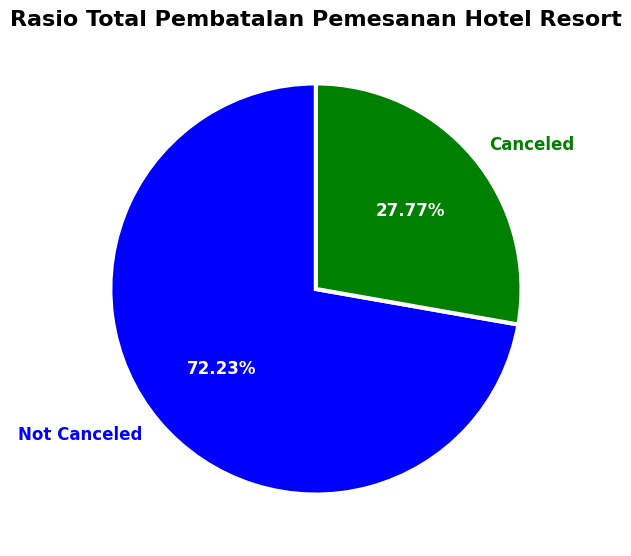

In [150]:
fig, ax = plt.subplots(figsize=(6, 6))
#-------------------------------------------------------------------
patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['blue', 'green'])
#-------------------------------------------------------------------
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Rasio Total Pembatalan Pemesanan Hotel Resort', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

**Key takeaways**:


- City Hotel memiliki tingkat pembatalan (cancellation rate) yang lebih tinggi dibandingkan dengan Resort Hotel, dengan lebih dari 41% pesanan dibatalkan di City Hotel, sementara hanya sekitar 27% di Resort Hotel.

- Kemungkinan penyebab dari tingkat pembatalan yang tinggi di City Hotel bisa terkait dengan lokasinya yang terpusat di kota atau daerah perkotaan, dekat dengan tempat-tempat wisata dan bisnis, yang mungkin mengakibatkan lebih banyaknya aktivitas yang mempengaruhi perubahan rencana pelanggan.

- Resort Hotel mungkin memiliki tingkat pembatalan yang lebih rendah karena karakteristik lokasinya yang biasanya berada di daerah liburan atau pantai yang jauh dari hiruk-pikuk perkotaan, yang membuatnya kurang rentan terhadap perubahan rencana mendadak.





#### Stay Duration

Berapa lama durasi waktu menginap yang dipesan oleh pelanggan dapat dilihat dalam fitur `stays_in_weekdays_nights` dan `stays_in_weekend_nights`

In [152]:
df_viz['total_stay_duration'] = df_viz['stays_in_weekdays_nights'] + df_viz['stays_in_weekend_nights']
df_viz.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration
102646,City Hotel,0,29,2018,February,49,2,0,2,1,...,4,No Deposit,0.0,0,Family,66.18,0,1,Check-Out,2
97907,City Hotel,0,159,2018,November,39,19,1,2,2,...,0,No Deposit,240.0,0,Family,144.00,0,0,Check-Out,3
79964,City Hotel,0,42,2017,January,45,5,0,3,2,...,0,No Deposit,28.0,0,Personal,60.00,0,0,Check-Out,3
93564,City Hotel,0,292,2018,September,30,21,0,2,2,...,0,No Deposit,6.0,0,Family,115.00,0,0,Check-Out,2
118690,City Hotel,0,175,2019,October,34,21,1,2,2,...,1,No Deposit,9.0,0,Personal,135.00,0,2,Check-Out,3


In [155]:
unik = df_viz['total_stay_duration'].nunique()
mx = df_viz['total_stay_duration'].max()
mn = df_viz['total_stay_duration'].min()

print('Nilai unik:', unik)
print('Max durasi:', mx)
print('Min durasi:', mn)

Nilai unik: 42
Max durasi: 69
Min durasi: 0


In [156]:
df_viz['total_stay_week'] = np.where((df_viz['total_stay_duration']) < 8, '< 1' ,
                                   np.where((df_viz['total_stay_duration']) < 15, '1-2',
                                   np.where((df_viz['total_stay_duration']) < 22, '2-3',
                                   np.where((df_viz['total_stay_duration']) < 29, '3-4', '> 4'))))

- kurang dari 1 minggu : 0 - 7 hari
- 1 - 2 minggu : 8 - 14 hari
- 2 - 3 minggu : 15 - 21 hari
- 2 - 4 minggu : 22 - 28 hari
- lebih dari 4 minggu : > 28 hari



#### Cancelation Rate by Stay Duration

In [157]:
# group cancel rate based on totel type,duration
cancel_rate = df_viz.groupby(['hotel', 'total_stay_week']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
cancel_rate['cancel_rate'] = 100*(cancel_rate['is_canceled'] / cancel_rate['arrival_date_day_of_month']).round(2)
cancel_rate

# --------------------------------------------------------------------------------------------------------------------------------------
# sorted by week
week = ['< 1', '1-2', '2-3', '3-4', '> 4']
cancel_rate['total_stay_week'] = pd.Categorical(cancel_rate['total_stay_week'], categories = week)
cancel_rate = cancel_rate.sort_values('total_stay_week')
cancel_rate

,hotel,total_stay_week,is_canceled,arrival_date_day_of_month,cancel_rate
3,City Hotel,< 1,32404,77942,42.0
8,Resort Hotel,< 1,9917,36042,28.0
0,City Hotel,1-2,558,1069,52.0
5,Resort Hotel,1-2,1078,3728,29.0
1,City Hotel,2-3,76,105,72.0
6,Resort Hotel,2-3,79,169,47.0
2,City Hotel,3-4,21,25,84.0
7,Resort Hotel,3-4,39,83,47.0
4,City Hotel,> 4,20,22,91.0
9,Resort Hotel,> 4,7,25,28.0


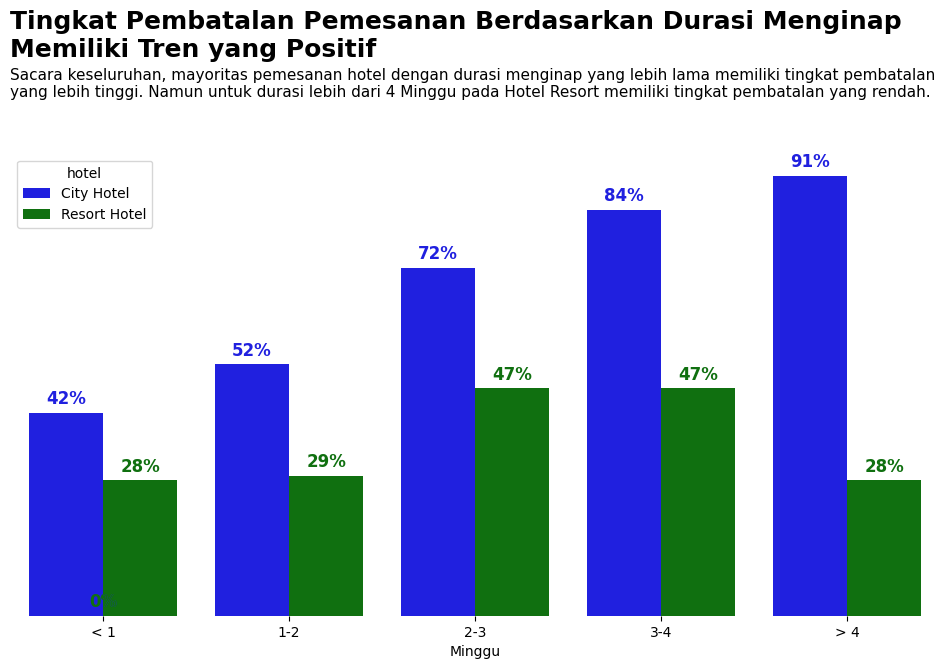

In [160]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

# -----------------------------------------------------------------------------------------------------------------------------
# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------------------------
# plot
ax = sns.barplot(x = cancel_rate['total_stay_week'], y = cancel_rate['cancel_rate'], hue=cancel_rate['hotel'],
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['blue', 'green'])

# -----------------------------------------------------------------------------------------------------------------------------
# mengatur label
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
plt.ylabel('')
plt.xlabel('Minggu')

# -----------------------------------------------------------------------------------------------------------------------------
# menambahkan judul dan deskripsi
plt.title('Tingkat Pembatalan Pemesanan Berdasarkan Durasi Menginap \nMemiliki Tren yang Positif', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 110, x = -0.5, s = 'Sacara keseluruhan, mayoritas pemesanan hotel dengan durasi menginap yang lebih lama memiliki tingkat pembatalan \nyang lebih tinggi. Namun untuk durasi lebih dari 4 Minggu pada Hotel Resort memiliki tingkat pembatalan yang rendah.',
         ha='left', va='center', size=11)


# -----------------------------------------------------------------------------------------------------------------------------
patches
for a in ax.patches:
    txt = np.round(a.get_height(), decimals=2)
    anot = str(round(txt))
    color = a.get_facecolor()
    ax.annotate(anot+'%', (a.get_x()+a.get_width()/2, a.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=12, fontweight='bold', color=color)

**Key takeaways**:


- Durasi menginap yang lebih lama cenderung memiliki tingkat pembatalan (cancellation rate) yang lebih tinggi, baik untuk City Hotel maupun Resort Hotel.
- Resort Hotel mengalami peningkatan tingkat pembatalan seiring dengan durasi menginap yang lebih lama, namun tidak sebesar City Hotel.
- Tingkat pembatalan Resort Hotel hanya sekitar 28% untuk durasi menginap lebih dari 4 minggu, mungkin karena pelanggan yang memesan dalam jangka waktu yang lebih lama memiliki komitmen yang lebih tinggi dan kebijakan pembatalan yang ketat dari hotel.
- Strategi pengelolaan pemesanan dan promosi khusus dapat membantu City Hotel meningkatkan retensi pelanggan, sementara Resort Hotel dapat mempertimbangkan pemasaran yang menekankan pengalaman liburan unik untuk meminimalkan tingkat pembatalan.




###  Impact Analysis Of Lead Time On Hotel Bookings Cancellation Rate


---



Analisis ini berfokus untuk melihat trend Lead time atau masa tunggu (jarak waktu pemesanan hotel hingga waktu kedatangan) dan tingkat pembatalan pemesanan hotel.

#### Durasi Lead Time

In [161]:
unik = df_viz['lead_time'].nunique()
mx = df_viz['lead_time'].max()
mn = df_viz['lead_time'].min()

print('Nilai unik:', unik)
print('Max durasi:', mx)
print('Min durasi:', mn)

Nilai unik: 479
Max durasi: 737
Min durasi: 0


Lead time memiliki rentang 0 hingga 709 hari, untuk memudahkan interpretasi maka akan dibuat pengkategorian perbualan.

In [163]:
df_viz['lead_category'] = np.where((df_viz['lead_time']) < 31, '1',
                        np.where((df_viz['lead_time']) <= 61, '2',
                        np.where((df_viz['lead_time']) <= 91, '3',
                        np.where((df_viz['lead_time']) <= 121, '4',
                        np.where((df_viz['lead_time']) <= 151, '5',
                        np.where((df_viz['lead_time']) <= 181, '6',
                        np.where((df_viz['lead_time']) <= 211, '7',
                        np.where((df_viz['lead_time']) <= 241, '8',
                        np.where((df_viz['lead_time']) <= 271, '9',
                        np.where((df_viz['lead_time']) <= 301, '10',
                        np.where((df_viz['lead_time']) <= 331, '11',
                        np.where((df_viz['lead_time']) <= 361, '12', '>1 tahun'))))))))))))

#### Cancelation Rate by Lead Time

In [164]:
# summmary
lead_cancel = df_viz.groupby(['hotel', 'lead_category']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
lead_cancel['lead_cr'] = 100*(lead_cancel['is_canceled'] / lead_cancel['arrival_date_day_of_month']).round(2)

# --------------------------------------------------------------------------------------------------------------------------------------
# sorted
cat = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '>1 tahun']
lead_cancel['lead_category'] = pd.Categorical(lead_cancel['lead_category'], categories = cat)
lead_cancel = lead_cancel.sort_values('lead_category')
lead_cancel

,hotel,lead_category,is_canceled,arrival_date_day_of_month,lead_cr
0,City Hotel,1,5184,23244,22.0
13,Resort Hotel,1,1984,15336,13.0
4,City Hotel,2,4803,12255,39.0
17,Resort Hotel,2,1594,5210,31.0
5,City Hotel,3,3601,8774,41.0
18,Resort Hotel,3,1279,3624,35.0
19,Resort Hotel,4,1157,2993,39.0
6,City Hotel,4,3464,7366,47.0
20,Resort Hotel,5,1040,2538,41.0
7,City Hotel,5,2574,5700,45.0


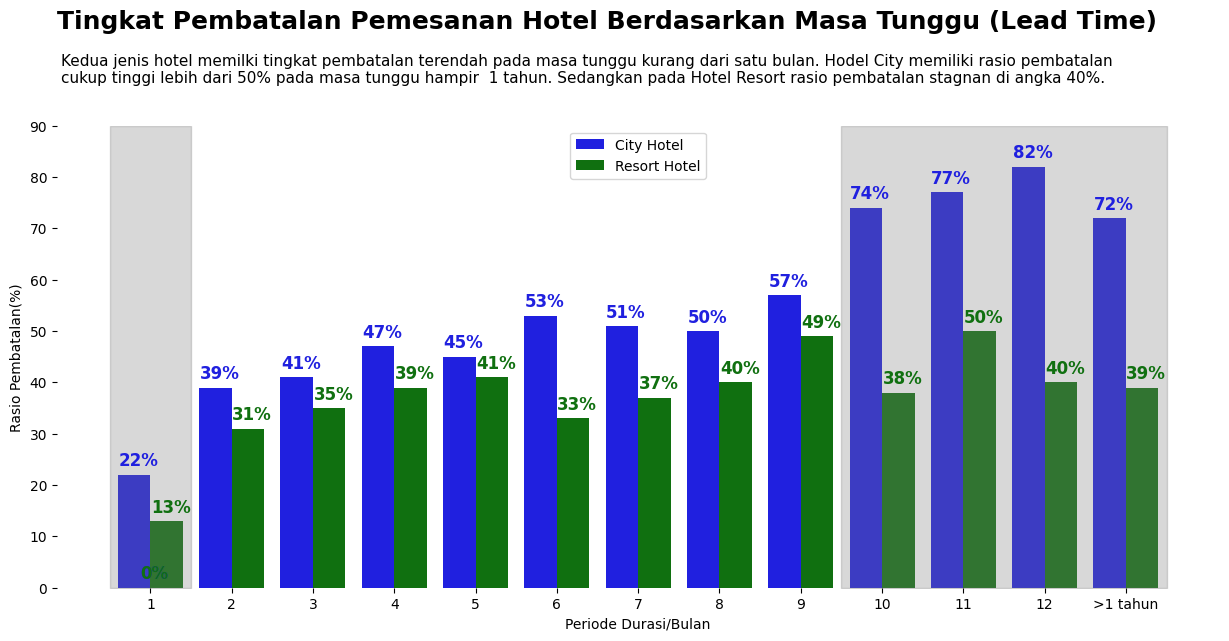

In [178]:
# membuat visualisasi data
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(15,6)

# -----------------------------------------------------------------------------------------------------------
# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------
# plot
ax = sns.barplot(x = lead_cancel['lead_category'], y = lead_cancel['lead_cr'], hue=lead_cancel['hotel'],
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['blue', 'green'])
plt.ylim(0,90)

# -----------------------------------------------------------------------------------------------------------
# mengatur label
plt.ylabel('Rasio Pembatalan(%)')
plt.xlabel('Periode Durasi/Bulan')
plt.legend(loc='upper center')

# -----------------------------------------------------------------------------------------------------------
# menambahkan judul dan deskripsi
plt.title('Tingkat Pembatalan Pemesanan Hotel Berdasarkan Masa Tunggu (Lead Time)', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 101, x = -1.1, s = 'Kedua jenis hotel memilki tingkat pembatalan terendah pada masa tunggu kurang dari satu bulan. Hodel City memiliki rasio pembatalan \ncukup tinggi lebih dari 50% pada masa tunggu hampir  1 tahun. Sedangkan pada Hotel Resort rasio pembatalan stagnan di angka 40%.',
         ha='left', va='center', size=11)

# -----------------------------------------------------------------------------------------------------------------------------
patches
for a in ax.patches:
    txt = np.round(a.get_height(), decimals=2)
    anot = str(round(txt))
    color = a.get_facecolor()
    ax.annotate(anot+'%', (a.get_x()+a.get_width()/2+0.05, a.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=12, fontweight='bold', color=color)

# -----------------------------------------------------------------------------------------------------------
# set cr
plt.stackplot([-0.5, 0.5], [90], color='grey', alpha=0.3)
plt.stackplot([8.5, 12.5], [90], color='grey', alpha=0.3)

**Key takeaways**:


- Tingkat pembatalan yang lebih rendah di Resort Hotel dalam seluruh kategori jarak waktu pemesanan dibandingkan dengan City Hotel disebabkan oleh profil pelanggan yang cenderung merencanakan perjalanan jauh hari dan kebijakan pembatalan yang lebih ketat.
- Tingkat pembatalan cenderung meningkat seiring dengan meningkatnya jarak waktu pemesanan, terutama pada City Hotel, yang mencapai puncaknya pada kategori "12 bulan" dengan tingkat pembatalan sebesar 82% hal ini mungkin terjadi karena adanya ketidakpastian perencanaan jauh hari dan kemungkinan perubahan rencana pelanggan.
- Untuk mengurangi tingkat pembatalan yang tinggi, perusahaan perlu menerapkan kebijakan pembatalan yang lebih fleksibel dan meningkatkan komunikasi proaktif dengan pelanggan untuk mempertahankan reservasi.



# Conclusion

**Business Questions Insights:**

- **Jenis hotel apa yang paling sering dikunjungi oleh pelanggan?**
  - Resort Hotel memiliki jumlah pemesanan yang lebih tinggi dibandingkan dengan City Hotel.
  - City Hotel memiliki tingkat pembatalan yang lebih tinggi dibandingkan dengan Resort Hotel, menunjukkan kebutuhan untuk meningkatkan retensi pelanggan.

- **Apakah terdapat pola kenaikan atau penurunan pemesanan hotel pada bulan-bulan tertentu?**
  - Pemesanan hotel cenderung meningkat pada bulan Mei, September, dan Oktober, sesuai dengan rentang waktu libur Lebaran, akhir tahun ajaran, dan Tahun Baru.

- **Apakah durasi menginap mempengaruhi tingkat pembatalan pemesanan hotel?**
  - Durasi menginap yang lebih lama cenderung memiliki tingkat pembatalan yang lebih tinggi, baik untuk City Hotel maupun Resort Hotel.
  - Resort Hotel mengalami peningkatan tingkat pembatalan seiring dengan durasi menginap yang lebih lama, namun tidak sebesar City Hotel.

- **Apakah jarak waktu antara pemesanan hotel dan hari kedatangan tamu mempengaruhi tingkat pembatalan pemesanan hotel?**
  - Tingkat pembatalan cenderung meningkat seiring dengan meningkatnya jarak waktu pemesanan, terutama pada City Hotel.
  - Tingkat pembatalan mencapai puncaknya pada kategori "12 bulan" dengan tingkat pembatalan sebesar 82%, terutama terjadi di City Hotel.
